# Lab 5

## by George Doykan (gd7448) and Pratyush Singh (pks629)

In [572]:
#general imports

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sbn
from mpl_toolkits.mplot3d import Axes3D
import random

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

### Problem 1

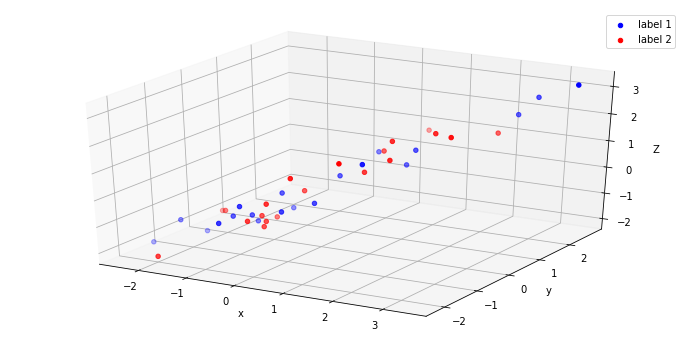

In [573]:
##Part 1
np.random.seed(20)
mean1 = [0,0,0]
cov1 = [[1,0.9,0.9],[0.9,1,0.9],[0.9,0.9,1]]
label_1 = np.random.multivariate_normal(mean1, cov1, size = 20)

mean2 = [0,0,1]
cov2 = [[1,0.8,0.8],[0.8,1,0.8],[0.8,0.8,1]]
label_2 = np.random.multivariate_normal(mean1, cov1, size = 20)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(label_1[:, 0], label_1[:, 1], zs=label_1[:, 2], c='b', label="label 1")
ax.scatter(label_2[:, 0], label_2[:, 1], zs=label_2[:, 2], c='r', label = "label 2")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Z')
legend = ax.legend(loc = "upper right")

plt.show()

In [574]:
##Part 2 Fisher's Linear Discriminant

#1) calculate mean vectors of both labels
mean_1 = np.mean(label_1, axis=0, keepdims=True)
mean_2 = np.mean(label_2, axis=0, keepdims=True)
mean_total = (mean_1 + mean_2)/2

#2) Compute scatter matrices (between class and within class)
s_1 = np.dot((label_1 - mean_1).T,(label_1 - mean_1))
s_2 = np.dot((label_2 - mean_2).T,(label_2 - mean_2))

s_w = np.linalg.inv(s_1 + s_2)

s_b_1  = np.dot((mean_1 - mean_total).T,(mean_1 - mean_total))
s_b_2  = np.dot((mean_2 - mean_total).T,(mean_2 - mean_total))
s_b = s_b_1 + s_b_2

#3) Compute eigenvectors and eigen values of scatter matrices
A = np.matmul(s_w, s_b)
eig_vals, eig_vecs = np.linalg.eig(A)
print(eig_vals)
print(eig_vecs)

[  3.52805406e-04   2.52493573e-21   1.93692170e-20]
[[ 0.57926765 -0.45423016  0.94427543]
 [-0.7964131  -0.24416361  0.32667149]
 [ 0.17371001  0.85677249 -0.04036889]]


## Fisher's Linear Discriminant

#### Now we choose the  eigenvector with the largest eigenvalue to form the discriminant vector W
#### As we can see, 3.52805e-04 is the largest eigenvalue corresponding to the eigenvector [0.57926765, -0.7964131, 0.17371001]

(40, 3)


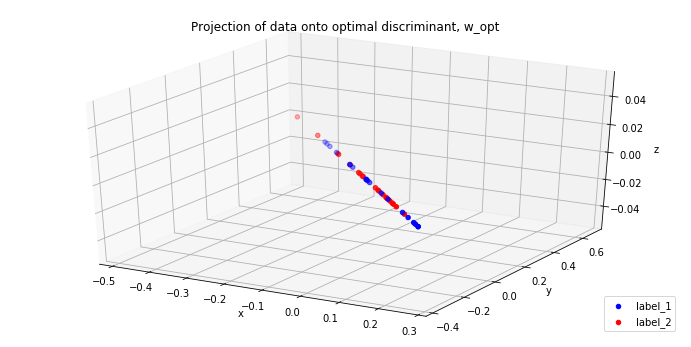

In [576]:
eig_vecs = np.real(eig_vecs)
w = eig_vecs[:, 0]

#Project the samples onto the new subspace using the optimal discriminant vector W in Y = X * W
X = np.concatenate((label_1, label_2))

projected_data = []
for i in range(40):
    new_data= np.dot(X[i,:], w)
    projected_data.append(new_data*w)

projected_data = np.asarray(projected_data)
print(projected_data.shape)
projected_data_label_1 = projected_data[0:20]
projected_data_label_2 = projected_data[20:40]

#create figure 
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(projected_data_label_1[:, 0], projected_data_label_1[:, 1], c='b', label="label_1")
ax.scatter(projected_data_label_2[:, 0], projected_data_label_2[:, 1],  c='r', label="label_2")
ax.set_title("Projection of data onto optimal discriminant, w_opt")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
legend = ax.legend(loc = "lower right")
plt.show()

In [578]:
## Fishers LDA with sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# create output classification 
y = []
for i in range(20):
    y.append(1)
for i in range(20):
    y.append(2)
    
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

w_sk = clf.coef_/np.linalg.norm(clf.coef_)
print(w_sk)

[[-0.57926765  0.7964131  -0.17371001]]


### The discriminant vector using sklearn LDA are the same as the discriminant vector "w" that we calculated using linear algebra. 

### Problem 2

### a)

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up
   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today  Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270          1
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576          1
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514          0
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712          0
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178          0


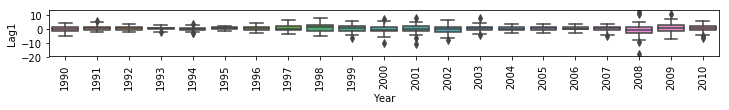

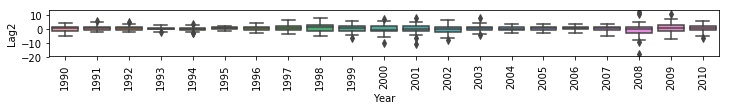

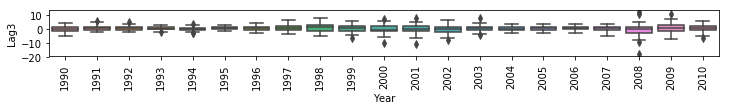

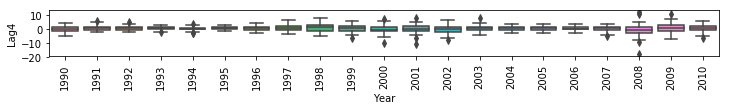

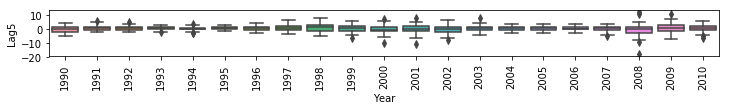

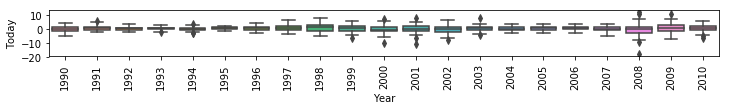

In [324]:
weekly = pd.read_csv('weekly.csv')
del weekly['Unnamed: 0'] #deleting the first column

print(weekly.head())
weekly['Direction'] = pd.get_dummies(weekly['Direction'])
print(weekly.head())

plt.subplot(611)
sbn.boxplot(x=weekly['Year'], y=weekly['Lag1'])
plt.xticks(rotation='vertical')
plt.show()

plt.subplot(612)
sbn.boxplot(x=weekly['Year'], y=weekly['Lag2'])
plt.xticks(rotation='vertical')
plt.show()

plt.subplot(613)
sbn.boxplot(x=weekly['Year'], y=weekly['Lag3'])
plt.xticks(rotation='vertical')
plt.show()

plt.subplot(614)
sbn.boxplot(x=weekly['Year'], y=weekly['Lag4'])
plt.xticks(rotation='vertical')
plt.show()

plt.subplot(615)
sbn.boxplot(x=weekly['Year'], y=weekly['Lag5'])
plt.xticks(rotation='vertical')
plt.show()

plt.subplot(616)
sbn.boxplot(x=weekly['Year'], y=weekly['Today'])
plt.xticks(rotation='vertical')
plt.show()

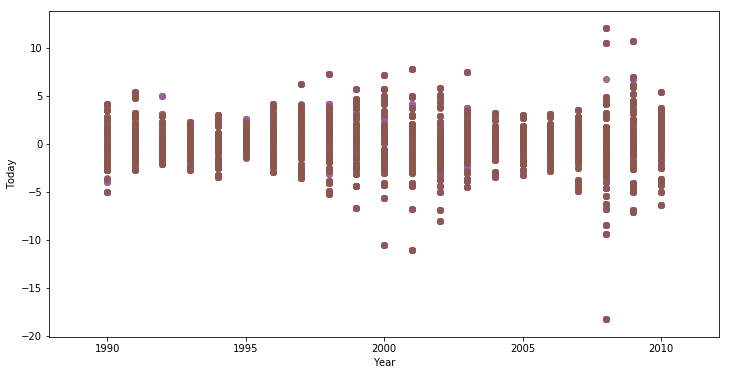

In [325]:
sbn.regplot(x=weekly['Year'], y=weekly['Lag1'], fit_reg=False)
sbn.regplot(x=weekly['Year'], y=weekly['Lag2'], fit_reg=False)
sbn.regplot(x=weekly['Year'], y=weekly['Lag3'], fit_reg=False)
sbn.regplot(x=weekly['Year'], y=weekly['Lag4'], fit_reg=False)
sbn.regplot(x=weekly['Year'], y=weekly['Lag5'], fit_reg=False)
sbn.regplot(x=weekly['Year'], y=weekly['Today'], fit_reg=False)

### b)

In [386]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

X = weekly.loc[:,'Lag1':'Volume']
Y = weekly['Direction']
log_regression = LogisticRegression(fit_intercept=False)
logistic_model = log_regression.fit(X=X, y=Y)


for idx, col in enumerate(X.columns):
    print(col + ": " + str(logistic_model.coef_[0][idx]))

logit = sm.Logit(Y,X)
results = logit.fit()
print(results.summary2())

Lag1: 0.0327091937383
Lag2: -0.0681468107475
Lag3: 0.00809523599924
Lag4: 0.0194005782133
Lag5: 0.00685140925264
Volume: -0.0568820699077
Optimization terminated successfully.
         Current function value: 19.955366
         Iterations 4
                         Results: Logit
Model:              Logit            No. Iterations:   4.0000    
Dependent Variable: Direction        Pseudo R-squared: 0.376     
Date:               2018-02-25 18:53 AIC:              43474.7869
No. Observations:   1089             BIC:              43504.7450
Df Model:           5                Log-Likelihood:   -21731.   
Df Residuals:       1083             LL-Null:          -34818.   
Converged:          1.0000           Scale:            1.0000    
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Lag1       0.0327     0.0262    1.2503   0.2112   -0.

From the p-values in the table, the features Lag2 and Volume seem statistically signifcant because each of those features has a p-values of 0.0106 and 0.0336 respectively. P-value less than 0.05 suggesting that we can reject the null hypothesis (the null hypothesis being we don't need these feature) and include it as part of our model.

### c)

In [387]:
# predict
from sklearn.metrics import confusion_matrix
import statsmodels

#up is 0 and down is 1
y_hat = logistic_model.predict(X)
conf_matrix = confusion_matrix(Y, y_hat)
print(conf_matrix)

[[427 178]
 [312 172]]


The diagonals in the confusion matrix represent the values we predicted right. When we one-hot-encoded the variables, the zeros turned out to be "UP" and the ones turned out to be "Down". From the matrix we can see that we predicted 558 of the "UP" direction correctly, while predicting only 55 of the "Down" direction correctly.

In [390]:
mean = np.mean(y_hat == Y)
training_error = 1-mean
print("The training error is: " + str(training_error) + 
      ", and we predicted " + str(mean) + " correctly on average.")

print("We predicted: " + str(427/(427+178+312+172) * 100) + "% correctly when the stock market was Up")

The training error is: 0.449954086318, and we predicted 0.550045913682 correctly on average.
We predicted: 39.21028466483012% correctly when the stock market was Up


### d)

In [391]:
training = weekly[(weekly['Year'] <= 2008)]
testing = weekly[(weekly['Year'] > 2008)]
X_train = training['Lag2'].values.reshape(-1,1)
Y_train = training['Direction']
X_test = testing['Lag2'].values.reshape(-1,1)
Y_test = testing['Direction']

log_regression = LogisticRegression()
logistic_model = log_regression.fit(X=X_train, y=Y_train)
predictions = logistic_model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, predictions)

print(conf_matrix)
print("Our testing error was: " + str(np.mean(predictions != Y_test) * 100))
print("We predicted: " + str(56/(56+5+34+9) * 100) + "% correctly when the stock market was Up")

[[56  5]
 [34  9]]
Our testing error was: 37.5
We predicted: 53.84615384615385% correctly when the stock market was Up


The model with only Lag2 as the feature predicted 61 "UP" correctly and predicted 0 "Down" correctly. The test error rate is 37.5%, which means we predicted only 62.5% correctly. The accuracy for predicting "UP" when the direction was already "UP" increased to approximately 53%

### e) (using LDA)

In [392]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X=X_train, y=Y_train)
y_hat = lda_model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_hat)

print(conf_matrix)

[[56  5]
 [34  9]]


The results are the same as the logistic regression. 

### f) (using QDA)

In [393]:
qda = QuadraticDiscriminantAnalysis()
qda_model = qda.fit(X=X_train, y=Y_train)
y_hat = qda.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_hat)
print(conf_matrix)
print("We predicted " + str(np.mean(y_hat == Y_test) * 100) + "% of the test data correctly")
print("When the true value was UP, we predicted UP " + str(61/(43+61) * 100) + "% of the time")

[[61  0]
 [43  0]]
We predicted 58.6538461538% of the test data correctly
When the true value was UP, we predicted UP 58.65384615384615% of the time


### g) (KNN)

In [394]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, Y_train)
y_hat = neigh.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_hat)
print(conf_matrix)
print("We predicted " + str(np.mean(y_hat == Y_test) * 100) + "% of the test data correctly")
print("When the true value was UP, we predicted UP " + str(30/(30+31+22+21) * 100) + "% of the time")

[[30 31]
 [22 21]]
We predicted 49.0384615385% of the test data correctly
When the true value was UP, we predicted UP 28.846153846153843% of the time


### h)

Logistic Regression with Lag2 as the only feature or LDA were the two most accurate methods yielding accuracy of 62.5% on the test set. This was higher than KNN or QDA, with KNN being the least accurate. However, the QDA model had the highest accuracy of predicting "UP" when the true value was "UP". This suggests that if the model predicted UP, then it would be better to trade and not trade when the model predicts "down".

### i)

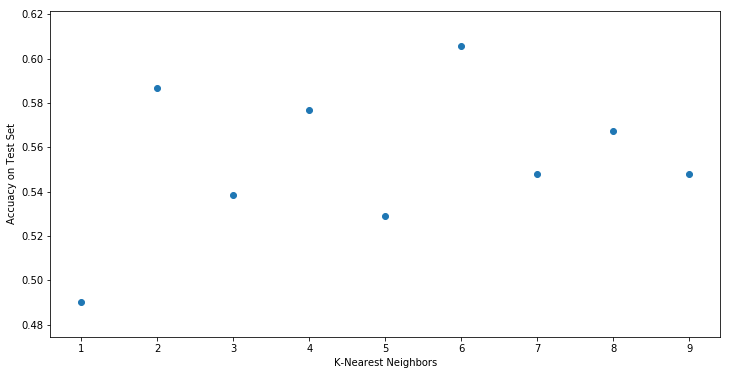

In [395]:
n_neigh = np.arange(1, 10)
acc = []
for i in n_neigh:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    y_hat = neigh.predict(X_test)
    accuracy = np.mean(y_hat == Y_test)
    acc.append(accuracy)

plt.scatter(x=n_neigh, y=acc)
plt.xlabel('K-Nearest Neighbors')
plt.ylabel('Accuacy on Test Set')

Looking at the first 10 K-Nearest Neighbors, we can see that max accuracy occurs when K is 6.

In [396]:
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train, Y_train)
y_hat = neigh.predict(X_test)
print(confusion_matrix(Y_test, y_hat))
print("The accuracy on the test set is " + str(np.mean(y_hat == Y_test)))

[[49 12]
 [29 14]]
The accuracy on the test set is 0.605769230769


In [405]:
#trying logistic regression
cols = ['Lag2', 'Lag1']
x_train = training[cols]
x_test = testing[cols]

logistic_regression = LogisticRegression()
model = logistic_regression.fit(x_train, Y_train)
predictions = model.predict(x_test)

print(confusion_matrix(Y_test, predictions))
print("The accuracy on the test set is " + str(np.mean(predictions == Y_test)))

[[53  8]
 [36  7]]
The accuracy on the test set is 0.576923076923


In [415]:
#experimenting with LDA
lda = LinearDiscriminantAnalysis()
model = lda.fit(x_train, Y_train)
predictions = model.predict(x_test)

print(confusion_matrix(Y_test, predictions))
print("The accuracy on the test set is " + str(np.mean(predictions == Y_test)))

[[53  8]
 [36  7]]
The accuracy on the test set is 0.576923076923


In [416]:
#experimenting with QDA
qda = QuadraticDiscriminantAnalysis()
model = qda.fit(x_train, Y_train)
predictions = model.predict(x_test)

print(confusion_matrix(Y_test, predictions))
print("The accuracy on the test set is " + str(np.mean(predictions == Y_test)))

[[51 10]
 [36  7]]
The accuracy on the test set is 0.557692307692


In [417]:
#experimenting with KNN
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(x_train, Y_train)
y_hat = neigh.predict(x_test)
print(confusion_matrix(Y_test, y_hat))
print("The accuracy on the test set is " + str(np.mean(y_hat == Y_test)))

[[43 18]
 [29 14]]
The accuracy on the test set is 0.548076923077


## Problem 3

### a)

In [498]:
default_df_ = pd.read_csv('/Users/pratyushsingh/Downloads/default.csv')
del default_df_['Unnamed: 0']
np.random.seed(3)

cols = ['income', 'balance']
X = default_df_[cols]
default_df_['default'] = pd.get_dummies(default_df_['default'])
Y = default_df_['default']
logistic_reg = LogisticRegression()
model_ = logistic_reg.fit(X, Y)

### b)

In [549]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=True) #part a
model = logistic_reg.fit(x_train, y_train) #part b
y_hat = model.predict(x_test) #part c

print("The accuracy for this model is: " + str(model.score(x_test, y_test)))
mean_squared_error(y_test, y_hat)

The accuracy for this model is: 0.969090909091


0.03090909090909091

### c1)

In [569]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, shuffle=True) #part a
model = logistic_reg.fit(x_train, y_train) #part b
y_hat = model.predict(x_test) #part c

print("The accuracy for this model is: " + str(model.score(x_test, y_test)))
mean_squared_error(y_test, y_hat) #part d

The accuracy for this model is: 0.9678


0.032199999999999999

### c2)

In [570]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.75, shuffle=True) #part a
model = logistic_reg.fit(x_train, y_train) #part b
y_hat = model.predict(x_test) #part c

print("The accuracy for this model is: " + str(model.score(x_test, y_test)))
mean_squared_error(y_test, y_hat) #d

The accuracy for this model is: 0.966


0.034000000000000002

### c3)

In [552]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=True) #part a
model = logistic_reg.fit(x_train, y_train) #part b
y_hat = model.predict(x_test) #part c

print("The accuracy for this model is: " + str(model.score(x_test, y_test)))
mean_squared_error(y_test, y_hat) #part d

The accuracy for this model is: 0.968181818182


0.031818181818181815

 We tested the score three times for three different test-split ratios: 0.50, 0.75, and 0.10. The results were a little eratic, because at different times different splits would have a lower MSE. We found that having a 50-50 split between training and test data provided the most consistent results. The erratic nature of this validation method shows that it can be highly variable and is dependent upon the data in the training and testing set.

### d)

In [562]:
default_df_['student'] = pd.get_dummies(default_df_['student'])
cols = ['income', 'balance','student']
X = default_df_[cols]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, shuffle=True)
model = logistic_reg.fit(x_train, y_train)
y_hat = model.predict(x_test)

print("The accuracy for this model is: " + str(model.score(x_test, y_test)))
mean_squared_error(y_test, y_hat) #part d

The accuracy for this model is: 0.968


0.032000000000000001

The addition of the student variable did not help our accuracy very significantly. The addition of student helped the model stay closer to the 97% accuracy for multiple splits. 

## Problem 4

### a)

In [478]:
np.random.seed(1)
x = np.random.normal(0, 1, 1000)
y = x - 2 * x ** 2 + np.random.normal(0, 1, 1000) ##need to do n and p portion

### b)

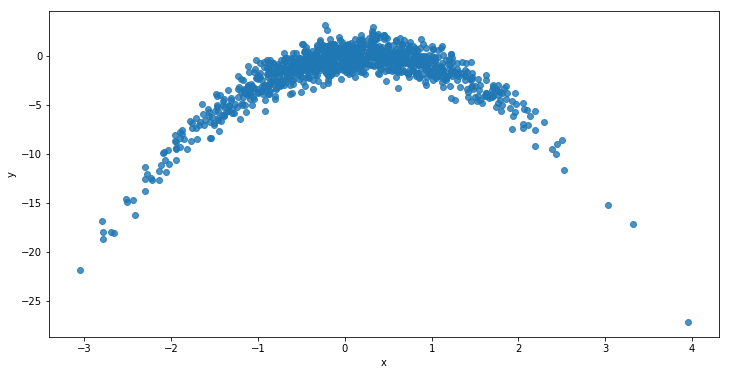

In [479]:
sbn.regplot(x=x, y=y, fit_reg=False)
plt.xlabel("x")
plt.ylabel("y")

### c)

In [480]:
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

loo = LeaveOneOut()
order_of_polynomials = np.arange(1,5)
scores = []
regression = LinearRegression()

for i in order_of_polynomials:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(x.reshape(-1,1))
    score = cross_val_score(regression, X_poly, y, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)

print(scores)

[-9.1127537774664003, -1.0633437348835826, -1.0654540727285116, -1.0644572023188597]


1000